In [1]:
#Instalo e importo paquetes 

!pip install pandas
import pandas as pd 

import numpy as np 
import os

from IPython.display import Image, display, HTML

import matplotlib.pyplot as plt
import seaborn as sns




In [15]:
html_texto = """
<h1>TP 2 - UN PRIMER ENCUENTRO CON LA EPH</h1>
<h3 style="color: navy;">Parte 1</h3>
<p> 
EXPLICAR CÓMO EL INDEC IDENTIFICA A LAS PERSONAS POBRES.</p>
<p>
Se realiza mediante el método de medición indirecta, que evalúa si los ingresos de los hogares son insuficientes para cubrir necesidades básicas. <br>

Este proceso incluye:<br>
<br>
Cálculo de la Canasta Básica Alimentaria (CBA)<br>
Define el costo mínimo de alimentos esenciales para satisfacer requerimientos calóricos y nutricionales.<br>

Los hogares cuyos ingresos no alcanzan para cubrir la CBA se consideran en indigencia.
</p>
<p>
Cálculo de la Canasta Básica Total (CBT)<br>
Incluye la CBA más bienes y servicios no alimentarios (vivienda, educación, salud, transporte, etc.).<br>
Los hogares con ingresos inferiores a la CBT se clasifican como pobres no indigentes.
</p>
<p>

Recolección de datos mediante la Encuesta Permanente de Hogares (EPH)<br>
El INDEC utiliza esta encuesta para obtener información sobre ingresos familiares y características socioeconómicas, 
lo que permite compararlos con los umbrales de CBA y CBT.

</p>
"""
display(HTML(html_texto))


In [16]:
html_texto = """
<h3 style="color: navy;">Parte 2</h3>
<p> 
Descargar las bases de datos de Individuos y Hogares del primer trimestre de 2005 y 2025.<br>
Elegir una region y 15 variables para trabajar.<br>
Unir las de Individuos y de Hogares y cruzarlas entre si
</p>

"""
display(HTML(html_texto))

In [8]:
html_texto = """
<h3 style="color: Black;">Punto 2.a</h3>
<p> 
</p>

"""
display(HTML(html_texto))

In [4]:
#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2025
t0125 = pd.read_excel('usu_individual_T125.xlsx')


In [7]:

#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2005
t0105 = pd.read_stata('Individual_t105.dta')

#Seteo el tamaño de las Columnas y Filas que me muestra Jupiter
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 20)

#VOY ANALIZANDO LOS TIPOS DE DATOS DE AMBOS DATAFRAMES. PARA ESTABLECER LAS COLUMNAS QUE REQUIEREN RECONVERSION
print(t0105.dtypes)
print(t0125.dtypes)

CODUSU          object
nro_hogar      float64
componente    category
h15           category
ano4           float64
                ...   
adeccfr         object
pj1_1         category
pj2_1         category
pj3_1         category
idimpp          object
Length: 176, dtype: object
CODUSU         object
ANO4            int64
TRIMESTRE       int64
NRO_HOGAR       int64
COMPONENTE      int64
               ...   
P_RDECCF      float64
P_GDECCF      float64
P_PDECCF      float64
P_IDECCF      float64
P_ADECCF      float64
Length: 235, dtype: object


In [10]:
html_texto = """
<h3 style="color: Black;">Punto 2.b</h3>
<p> 
</p>

"""
display(HTML(html_texto))

In [52]:

#PRIMERO VOY ESTABLECER LAS FILAS CON LAS QUE ME VOY A QUEDAR, EN LAS 2 TABLAS
#QUE SON LA DE LOS AGLOMERADOS DE LA REGION NOA

categorias = ['Santiago del Estero - La Banda', 'Salta', 'La Rioja', 'Gran Catamarca', 'Jujuy - Palpalá','Gran Tucumán - Tafí Viejo']
sel_t0105_1 = t0105[t0105['aglomerado'].isin(categorias)].copy()


categorias2 = [18,19,22,23,25,29]
sel_t0125_1 = t0125[t0125['AGLOMERADO'].isin(categorias2)].copy()

#AHORA VOY ESTABLECER LAS COLUMNAS CON LAS QUE ME VOY A QUEDAR, EN LAS 2 TABLAS

sel_t0105 = sel_t0105_1[[
'CODUSU', 'nro_hogar', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch14', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp04b_cod', 'ipcf'
]].copy()

sel_t0125 = sel_t0125_1[[
'CODUSU', 'NRO_HOGAR', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH14', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP04B_COD', 'IPCF'
]].copy()



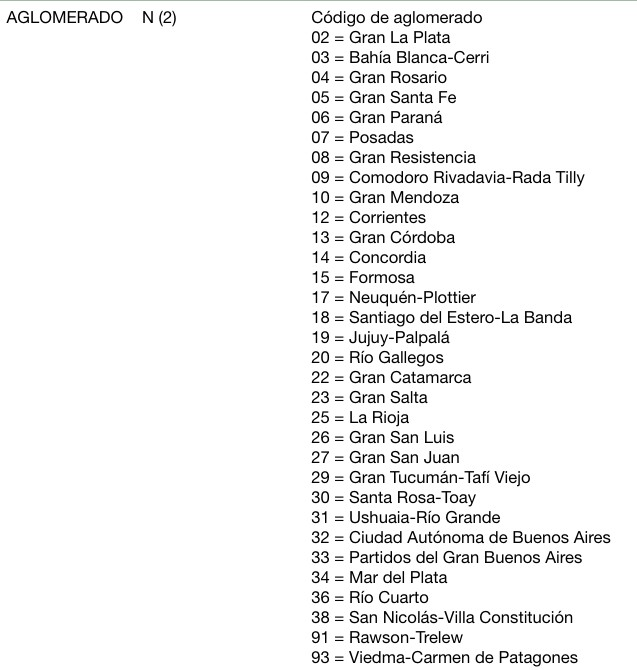

In [6]:
# Aqui empiezo a homogeneizar las bases de datos para poder filtrar y unificarlas.


#AGLOMERADOS: Del listado me voy a quedar solo con la región NOA

display(Image(filename='C:/Users/rodol/Desktop/BDyML/Repositorio/BigDataUBA-Grupo3/TP2-Grupo3/inputs/AGLOMERADO.jpg'))



In [53]:
#RECODIFICO LAS COLUMNAS NECESARIAS PARA QUE SE PUEDAN UNIFICAR, FINALMENTE AMBOS DATAFRAMES

# Diccionario del mapeo de los aglomerados pertenecientes al NOA
aglomerado_map = {
    'Santiago del Estero - La Banda': 18,    'Jujuy - Palpalá': 19,
    'Gran Catamarca': 22,    'Salta': 23,
    'La Rioja': 25,          'Gran Tucumán - Tafí Viejo': 29
                }
#Creo esta lista para ir depositando los errores que vaya encontrado la transformacion y después ver qué corregir 
errores = []

#Lo lleva a un tipo de dato que me facilita la transformacion
sel_t0105['aglomerado'] = sel_t0105['aglomerado'].astype(str)

#Armo un bucle para que recorra todas las celdas de la columna y vaya tranformando los datos segun el diccionario.
#Para ello utilizo la función .at[] con la que modifico una sola celda en un DataFrame, usando la combinación de índice y nombre de columna.


for i in sel_t0105.index:
    desc = sel_t0105.at[i, 'aglomerado']
    if desc in aglomerado_map:
        sel_t0105.at[i, 'aglomerado'] = aglomerado_map[desc]
    else:
        errores.append((i, desc))

#una vez recodificado, transformo el tipo de dato para poder ir homogeneizando ambos DF y poder unirlos finalmente

sel_t0105['aglomerado'] = sel_t0105['aglomerado'].astype('int64')



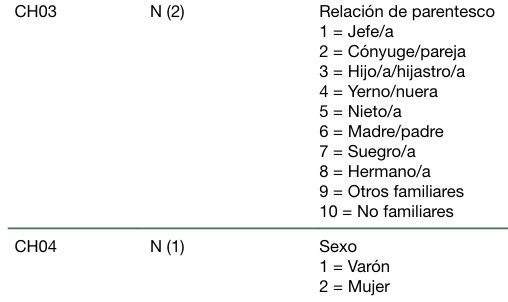

In [12]:
# DE AQUI EN ADELANTE, REPITO EL PROCESO ANTERIOR PARA LAS SIGUINTES COLUMNAS 

#Utilizo como referencia la codificacion de cada columna que figura en los pdf´s EPH_Diccionario 
display(Image(filename=r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\inputs\GP_SEXO.jpg'))


In [57]:

#Defino el diccionario de valores que debe buscar y reemplazar
ch03_map = {
    'Jefe/a': 1,     'Jefe': 1,
    'Cónyuge/pareja': 2,    'Cónyuge/Pareja': 2,
    'Hijo/a/hijastro/a': 3,  'Hijo/Hijastro': 3,
    'Yerno/nuera': 4,        'Yerno/Nuera': 4,
    'Nieto/a': 5,            'Nieto': 5,
    'Madre/padre': 6,         'Madre/Padre': 6,
    'Suegro/a': 7,             'Suegro': 7,
    'Hermano/a': 8,              'Hermano': 8,
    'Otros familiares': 9,
    'No familiares': 10
}

errores = []

#Para el 2005
sel_t0105['ch03'] = sel_t0105['ch03'].astype(str)

for i in sel_t0105.index:
    desc = sel_t0105.at[i, 'ch03']
    if desc in ch03_map:
        sel_t0105.at[i, 'ch03'] = ch03_map[desc]
    else:
        errores.append((i, desc))


#una vez recodificado transformo el tipo de dato a numerico
sel_t0105['ch03'] = pd.to_numeric(sel_t0105['ch03'], errors='coerce')


In [65]:
# tomare a la variable sexo de SEXO con una Dummies, en los 2 años, recodificandola en 0 y 1.

sel_t0105['ch04'] = np.where(sel_t0105['ch04'] == 'Varón', 1, 0)

sel_t0125['CH04'] = np.where(sel_t0125['CH04'] == 1,1,0)

#una vez recodificado transformo el tipo de dato
sel_t0105['ch04'] = sel_t0105['ch04'].astype('int64')


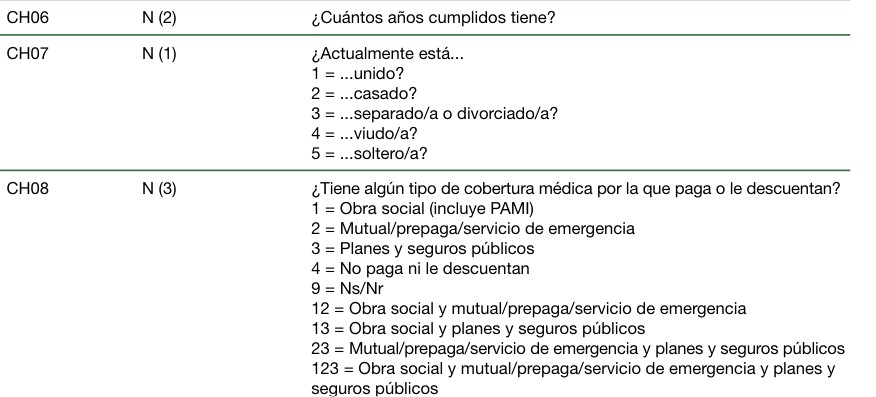

In [23]:
display(Image(filename=r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\inputs\EDAD_ECIVIL_OS.jpg'))

In [64]:
# Para el punto 2.C
#Excluimos los valores de EDAD-ch06 fuera de rango, que son aquellos de menos de un año y los mayores de 98 .. Pueden ser errores de carga

###########################################
#Para el 2005
sel_t0105['ch06'] = sel_t0105['ch06'].astype(str)

sel_t0105 = sel_t0105.loc[
    (sel_t0105['ch06'] != 'Menos de 1 año') & 
    (sel_t0105['ch06'] != '98 y más años')
]

sel_t0105['ch06'] = pd.to_numeric(sel_t0105['ch06'], errors='coerce')

###########################################

#Para el 2025
sel_t0125['CH06'] = sel_t0125['CH06'].astype(str)

sel_t0125 = sel_t0125.loc[
    (sel_t0125['CH06'] != 'Menos de 1 año') & 
    (sel_t0125['CH06'] != '98 y más años') &
    (sel_t0125['CH06'] != '103') &
    (sel_t0125['CH06'] != '-1') 
]

#una vez recodificado transformo el tipo de dato
sel_t0125['CH06'] = pd.to_numeric(sel_t0125['CH06'], errors='coerce')


In [63]:

#Para estado civil

ch07_map = {'Unido':1, 'Casado':2, 'Separado o divorciado':3, 'Viudo':4, 'Soltero':5  }


sel_t0105['ch07'] = sel_t0105['ch07'].astype(str)

for i in sel_t0105.index:
    desc = sel_t0105.at[i, 'ch07']
    if desc in ch07_map:
        sel_t0105.at[i, 'ch07'] = ch07_map[desc]
    else:
        errores.append((i, desc))

#una vez recodificado transformo el tipo de dato
sel_t0105['ch07'] = sel_t0105['ch07'].astype('int64')

In [62]:
#Para cobertura medica

#Diccionario para transformar
ch08_map = {
'Obra social (incluye PAMI)':1, 'Mutual/Prepaga/Servicio de emergencia':2, 'Planes y seguros públicos':3, 'No paga ni le descuentan':4, 'Ns./Nr.':9, 
'Obra social y mutual/prepaga/servicio de emergencia':12, 'Obra social y planes y seguros públicos':13, 
'Mutual /prepaga / servicio de emergencia / Planes y Seguros Públicos':23, 
'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos':123
}

sel_t0105['ch08'] = sel_t0105['ch08'].astype(str)

for i in sel_t0105.index:
    desc = sel_t0105.at[i, 'ch08']
    if desc in ch08_map:
        sel_t0105.at[i, 'ch08'] = ch08_map[desc]
    else:
        errores.append((i, desc))


sel_t0105['ch08'] = pd.to_numeric(sel_t0105['ch08'], errors='coerce')


In [61]:
#Para el último año que aprobo

#Primero lo llevo a string para despues llevarlo a numerico al campo del ultimo curso aprobado

sel_t0105['ch14'] = sel_t0105['ch14'].str.strip()

sel_t0105['ch14'] = pd.to_numeric(sel_t0105['ch14'], errors='coerce')


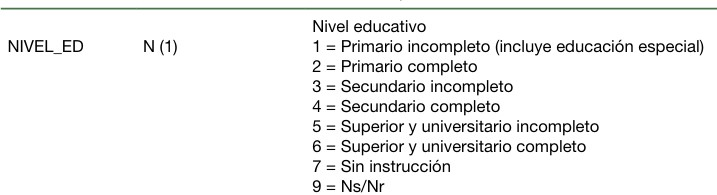

In [16]:
display(Image(filename=r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\inputs\N_EDUC.jpg'))

In [66]:
#Para el Nivel educativo

nivel_ed_map = {'Primaria Completa':2, 'Primaria Incompleta (incluye educación especial)':1, 'Secundaria Completa':4, 
            'Secundaria Incompleta':3, 'Sin instrucción':7, 'Superior Universitaria Completa':6, 
            'Superior Universitaria Incompleta':5, 'Ns/Nr':9
           }

sel_t0105['nivel_ed'] = sel_t0105['nivel_ed'].astype(str)

for i in sel_t0105.index:
    desc = sel_t0105.at[i, 'nivel_ed']
    if desc in nivel_ed_map:
        sel_t0105.at[i, 'nivel_ed'] = nivel_ed_map[desc]
    else:
        errores.append((i, desc))


sel_t0105['nivel_ed'] = pd.to_numeric(sel_t0105['nivel_ed'], errors='coerce')



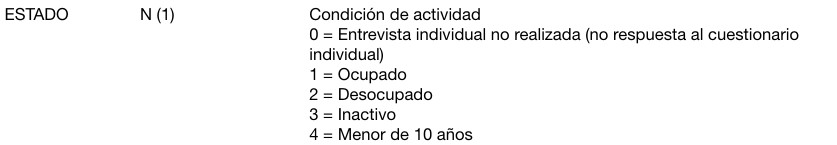

In [20]:
display(Image(filename=r"C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\inputs\EST_LABORAL.jpg"))

In [67]:
#Para la condicion de actividad

estado_map = {'Entrevista individual no realizada (no respuesta al cuestion':0, 
                'Ocupado':1, 'Desocupado':2, 'Inactivo':3, 'Menor de 10 años':4
               }

sel_t0105['estado'] = sel_t0105['estado'].astype(str)

for i in sel_t0105.index:
    desc = sel_t0105.at[i, 'estado']
    if desc in estado_map:
        sel_t0105.at[i, 'estado'] = estado_map[desc]
    else:
        errores.append((i, desc))


sel_t0105['estado'] = pd.to_numeric(sel_t0105['estado'], errors='coerce')


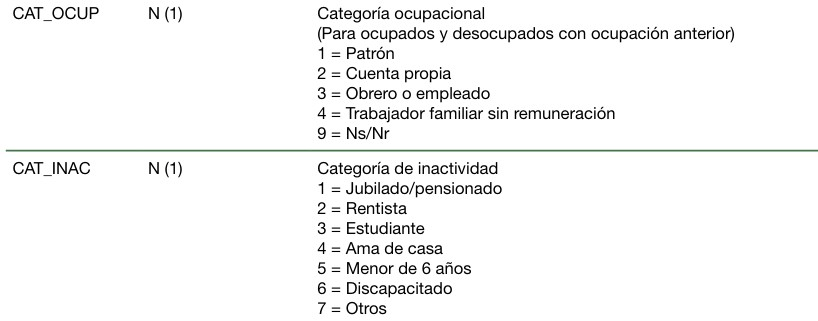

In [23]:
display(Image(filename=r"C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\inputs\OCUP_DESOCUP.jpg"))

In [68]:
#Para la categoria ocupacional

cat_ocup_map = {'Patrón':1, 'Cuenta propia':2, 'Obrero o empleado':3,
              'Trabajador familiar sin remuneración':4,'Nr/Nr':9
             }

errores = []

sel_t0105['cat_ocup'] = sel_t0105['cat_ocup'].astype(str)

for i in sel_t0105.index:
    desc = sel_t0105.at[i, 'cat_ocup']
    if desc in cat_ocup_map:
        sel_t0105.at[i, 'cat_ocup'] = cat_ocup_map[desc]
    else:
        errores.append((i, desc))


sel_t0105['cat_ocup'] = pd.to_numeric(sel_t0105['cat_ocup'], errors='coerce')

#Como el valor "0" no esta tipificado dentro de los cuadros de referencia, lo reemplazare por un valor nulo. Para los puntos 2.b y 2.c
sel_t0105['cat_ocup'] = sel_t0105['cat_ocup'].replace(0, np.nan)
sel_t0125['CAT_OCUP'] = sel_t0125['CAT_OCUP'].replace(0, np.nan)




In [69]:
#Para la categoria de inactividad

cat_inac_map = {'Ama de casa':4, 'Discapacitado':6, 'Estudiante':3, 'Jubilado/pensionado':1, 
                'Menor de 6 años':5, 'Otros':7, 'Rentista':2
                 }

sel_t0105['cat_inac'] = sel_t0105['cat_inac'].astype(str)

for i in sel_t0105.index:
    desc = sel_t0105.at[i, 'cat_inac']
    if desc in cat_inac_map:
        sel_t0105.at[i, 'cat_inac'] = cat_inac_map[desc]
    else:
        errores.append((i, desc))


sel_t0105['cat_inac'] = pd.to_numeric(sel_t0105['cat_inac'], errors='coerce')

sel_t0125['CAT_INAC'] = pd.to_numeric(sel_t0125['CAT_INAC'], errors='coerce')


In [70]:
# Se termina de limpiar datos de ambas bases. Para puntos 2.b y 2.c

#Como el valor "0" no esta tipificado dentro de los cuadros de referencia, lo reemplazare por un valor nulo

sel_t0105['cat_inac'] = sel_t0105['cat_inac'].replace(0, np.nan)
sel_t0125['CAT_INAC'] = sel_t0125['CAT_INAC'].replace(0, np.nan)

#Como en 2025, la columna de esta columna no figura como nulo pero en la de 2025 si, voy transformar el dato de 2005


sel_t0105['pp04b_cod'] = pd.to_numeric(sel_t0105['pp04b_cod'], errors='coerce')
sel_t0105['pp04b_cod'] = sel_t0105['pp04b_cod'].replace(0, np.nan)

#Porque sino despues no voy a poder concatenar los 2 Dataframes 
sel_t0125['PP04B_COD'] = pd.to_numeric(sel_t0125['PP04B_COD'], errors='coerce')



In [71]:
#Tengo que renombrar las columnas para que ambos dataframes tengan igual nombre porque sino 
#no voy a poder poder concatenar correctamente (en la misma columna, una abajo de la otra)los 2 DataFrames

sel_t0105 = sel_t0105.rename(columns={
'nro_hogar': 'NRO_HOGAR',
'aglomerado': 'AGLOMERADO',
'pondera': 'PONDERA',
'ch03': 'CH03',
'ch04': 'CH04',
'ch06': 'CH06',
'ch07': 'CH07',
'ch08': 'CH08',
'ch14': 'CH14',
'nivel_ed': 'NIVEL_ED',
'estado': 'ESTADO',
'cat_ocup': 'CAT_OCUP',
'cat_inac': 'CAT_INAC',
'pp04b_cod': 'PP04B_COD',
'ipcf': 'IPCF'
})

print(sel_t0105.dtypes)



CODUSU         object
NRO_HOGAR     float64
AGLOMERADO      int64
PONDERA       float64
CH03            int64
CH04            int64
CH06          float64
CH07            int64
CH08            int64
CH14          float64
NIVEL_ED        int64
ESTADO          int64
CAT_OCUP      float64
CAT_INAC      float64
PP04B_COD     float64
IPCF          float64
dtype: object


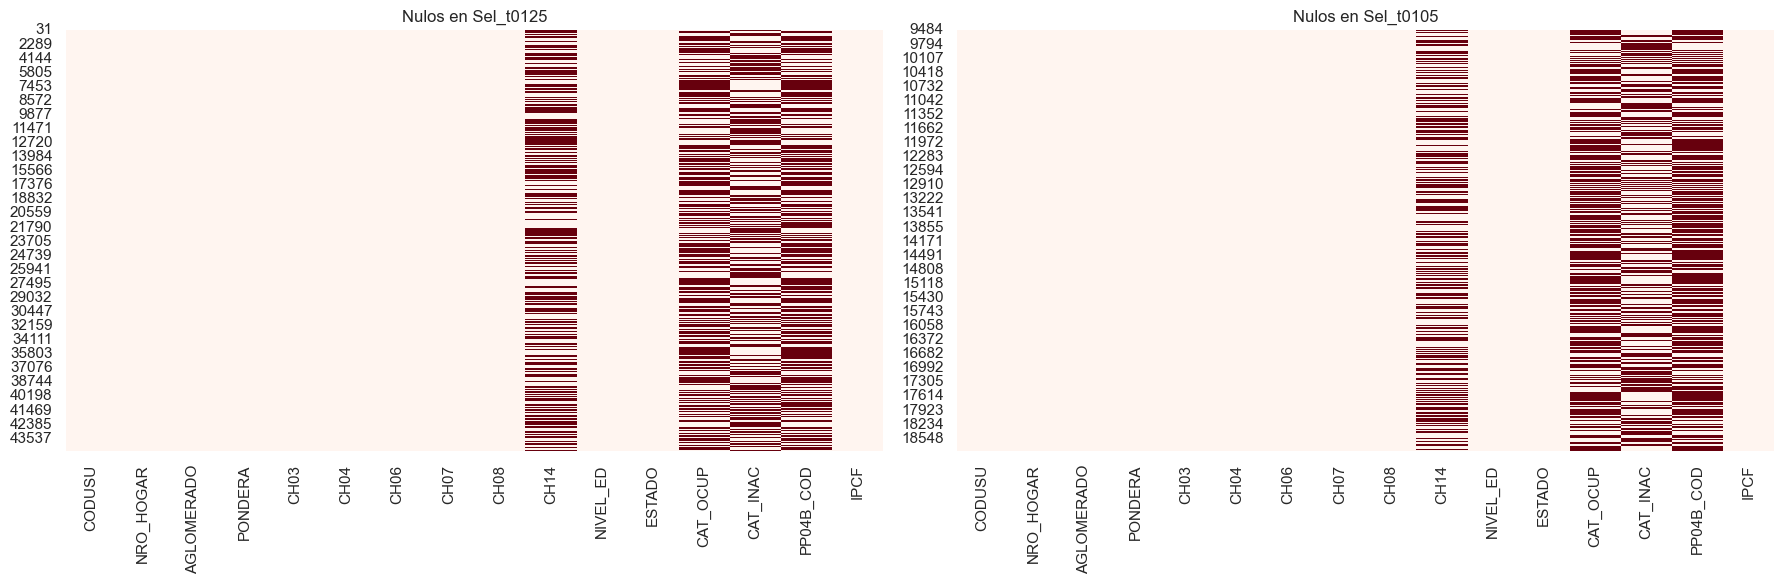

Nulos en Sel_t0125:
CODUSU           0
NRO_HOGAR        0
AGLOMERADO       0
PONDERA          0
CH03             0
CH04             0
CH06             0
CH07             0
CH08             0
CH14          4784
NIVEL_ED         0
ESTADO           0
CAT_OCUP      5167
CAT_INAC      4592
PP04B_COD     5337
IPCF             0
dtype: int64

Nulos en Sel_t0105:
CODUSU           0
NRO_HOGAR        0
AGLOMERADO       0
PONDERA          0
CH03             0
CH04             0
CH06             0
CH07             0
CH08             0
CH14          4010
NIVEL_ED         0
ESTADO           0
CAT_OCUP      5420
CAT_INAC      3875
PP04B_COD     5767
IPCF             0
dtype: int64


In [72]:
#Ahora paso a analizar los nulos de las columnas de ambos DataFrames. Punto 2.b

# Figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Aqui elijo el estilo
sns.set(style="whitegrid")


# Mapas de calor para las Selecciones

# Para 2025
sns.heatmap(sel_t0125.isnull(), cbar=False, ax=axes[0], cmap="Reds")
axes[0].set_title("Nulos en sel_t0125")

# Para 2005
sns.heatmap(sel_t0105.isnull(), cbar=False, ax=axes[1], cmap="Reds")
axes[1].set_title("Nulos en sel_t0105")


#Junto los 2 Mapas para verlos 
plt.tight_layout()
plt.show()

#Creo una tabla con un conteo de nulos en las columnas que le den fundamento al comentario pedido en el 2.b

print("Nulos en sel_t0125:")
print(sel_t0125.isnull().sum())

print("\nNulos en sel_t0105:")
print(sel_t0105.isnull().sum())

In [73]:
#Ahora uno a las 2 bases de datos individuales del 2.a

sel_indiv = pd.concat([sel_t0125, sel_t0105], axis=0, ignore_index=True)
#sel_indiv= sel_t0125.append(sel_t0105)

sel_indiv


,CODUSU,NRO_HOGAR,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,CH14,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP04B_COD,IPCF
0,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,1,0,73.0,5,1.0,NaN,2,3,NaN,1.0,NaN,198750.0
1,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,3,0,38.0,5,1.0,NaN,4,1,3.0,NaN,9700.0,198750.0
2,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,5,0,34.0,5,1.0,NaN,6,1,3.0,NaN,9700.0,198750.0
3,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,5,1,19.0,5,1.0,2.0,3,3,NaN,7.0,NaN,198750.0
4,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,5,1,16.0,5,1.0,NaN,2,3,NaN,7.0,NaN,198750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18867,287879,1.0,29,266.0,3,0,10.0,5,2.0,4.0,1,3,NaN,3.0,NaN,130.0
18868,288077,1.0,29,555.0,1,0,31.0,2,1.0,NaN,6,1,3.0,NaN,5306.0,562.5
18869,288077,1.0,29,555.0,2,0,29.0,2,1.0,NaN,6,3,NaN,4.0,NaN,562.5
18870,288077,1.0,29,555.0,3,0,4.0,5,1.0,NaN,7,4,NaN,5.0,NaN,562.5


In [74]:
#NO VA - Solo para revisar las transformaciones en excel

##############################################################

#destino
carpeta2 = r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP2-Grupo3\outputs'

#2005
# Asi se llamara el excel
archivo_nombre = "sel_t0105.xlsx"

destino = os.path.join(carpeta2, archivo_nombre)

# Guardo el archivo
sel_t0105.to_excel(destino, index=False)
##############################################################
#2025

archivo_nombre = "sel_t0125.xlsx"

destino = os.path.join(carpeta2, archivo_nombre)

sel_t0125.to_excel(destino, index=False)
##############################################################
#UNION

archivo_nombre = "sel_indiv.xlsx"

destino = os.path.join(carpeta2, archivo_nombre)

sel_indiv.to_excel(destino, index=False)


In [11]:
html_texto = """
<h3 style="color: Black;">Punto 2.d</h3>
<p> 
</p>

"""
display(HTML(html_texto))

In [12]:
#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2025
th0125 = pd.read_excel('usu_hogar_T125.xlsx')
#th0125

#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2005
th0105 = pd.read_stata('Hogar_t105.dta')


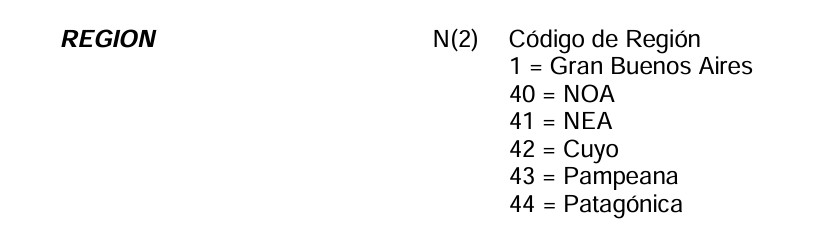

In [13]:
#Traigo los datos del diccionario sobre la columna region, que será mi filtro de filas.
display(Image(filename='C:/Users/rodol/Desktop/BDyML/Repositorio/BigDataUBA-Grupo3/TP2-Grupo3/inputs/REGION.jpg'))


In [ ]:
#Selecciono  las filas y columnas con la que trabajaré de cada trimestre

sel_th0105 = th0105.loc[th0105['region'] == 'NOA', ['CODUSU','nro_hogar','iv1', 'iv2', 'iv6', 'iv8', 'ii8']].copy()
#sel_th0105

sel_th0125 = th0125.loc[th0125['REGION'] == 40, ['CODUSU','NRO_HOGAR','IV1', 'IV2', 'IV6', 'IV8', 'II8']].copy()
#sel_th0125

#VOY ANALIZANDO LOS TIPOS DE DATOS DE AMBOS DATAFRAMES. PARA ESTABLECER LAS COLUMNAS QUE REQUIEREN RECONVERSION

print(sel_th0125.dtypes)
print(sel_th0105.dtypes)

In [ ]:

display(Image(filename='C:/Users/rodol/Desktop/BDyML/Repositorio/BigDataUBA-Grupo3/TP2-Grupo3/inputs/IV1.jpg'))


In [ ]:
#Ahora empezamos la transformacion de los tipos de datos para poder unificar ambos DF

#Para el NRO_HOGAR, llevamos al de 2005 al mismo que tiene el del 2025 aunque ambos sean numericos.
sel_th0105['nro_hogar'] = sel_th0105['nro_hogar'].astype('int64')

#Para TIPO DE VIVIENDA

#Defino el diccionario de valores que debe buscar y reemplazar
iv1_map = {
    'Casa': 1,     'Departamento': 2,
    'Pieza  de inquilinato': 3,    'Pieza  de hotel/Pensión': 4,
    'Local no construido para habitacion': 5,  'Otros': 6
}

errores = []

#Para el 2005
sel_th0105['iv1'] = sel_th0105['iv1'].astype(str)

for i in sel_th0105.index:
    desc = sel_th0105.at[i, 'iv1']
    if desc in iv1_map:
        sel_th0105.at[i, 'iv1'] = iv1_map[desc]
    else:
        errores.append((i, desc))


#una vez recodificado transformo el tipo de dato a numerico
sel_th0105['iv1'] = pd.to_numeric(sel_th0105['iv1'], errors='coerce')

#Para EN CUANTOS AMBIENTES VIVE

#Aqui solo transformo el tipo de dato a numerico. La opcion errors='coerce' deja el dato como NA´s.
sel_th0105['iv2'] = pd.to_numeric(sel_th0105['iv2'], errors='coerce')


In [ ]:

display(Image(filename='C:/Users/rodol/Desktop/BDyML/Repositorio/BigDataUBA-Grupo3/TP2-Grupo3/inputs/IV_6_8.jpg'))


In [ ]:
#Para TIENE AGUA

#Defino el diccionario de valores que debe buscar y reemplazar
iv6_map = {
    'Por cañeria dentro de la vivienda': 1,     'Fuera de la vivienda pero dentro del terreno': 2,    'Fuera del terreno': 3
            }
#Para meter los errores en una lista que vaya encontrado la transformacion y después que pueda imprimir y ver de corregirlos
errores = []

#Transformacion
sel_th0105['iv6'] = sel_th0105['iv6'].astype(str)

for i in sel_th0105.index:
    desc = sel_th0105.at[i, 'iv6']
    if desc in iv6_map:
        sel_th0105.at[i, 'iv6'] = iv6_map[desc]
    else:
        errores.append((i, desc))


#una vez recodificado transformo el tipo de dato a numerico
sel_th0105['iv6'] = pd.to_numeric(sel_th0105['iv6'], errors='coerce')


In [ ]:
# tomare a la variable de TIENE LETRINA con una Dummies, recodificandola en 0 y 1.

sel_th0105['iv8'] = np.where(sel_th0105['iv8'] == 'Sí', 1, 0)

#una vez recodificado transformo el tipo de dato
sel_th0105['iv8'] = sel_th0105['iv8'].astype('int64')


In [ ]:

display(Image(filename='C:/Users/rodol/Desktop/BDyML/Repositorio/BigDataUBA-Grupo3/TP2-Grupo3/inputs/Ii8.jpg'))


In [ ]:
#Para COMBUSTIBLE PARA COCINAR

#Defino el diccionario de valores que debe buscar y reemplazar
ii8_map = {
    'Gas de red': 1,     'Gas de tubo/garrafa': 2,    'Kerosene/leña/carbon': 3,    'Otro': 4
            }

errores = []

#Para el 2005
sel_th0105['ii8'] = sel_th0105['ii8'].astype(str)

for i in sel_th0105.index:
    desc = sel_th0105.at[i, 'ii8']
    if desc in ii8_map:
        sel_th0105.at[i, 'ii8'] = ii8_map[desc]
    else:
        errores.append((i, desc))


#una vez recodificado transformo el tipo de dato a numerico
sel_th0105['ii8'] = pd.to_numeric(sel_th0105['ii8'], errors='coerce')

In [ ]:
#Tengo que renombrar las columnas para que ambos dataframes tengan igual nombre porque sino 
#no voy a poder poder concatenar correctamente (en la misma columna, una abajo de la otra)los 2 DataFrames

sel_th0105 = sel_th0105.rename(columns={
'nro_hogar': 'NRO_HOGAR',
'iv1': 'IV1',
'iv2': 'IV2',
'iv6': 'IV6',
'iv8': 'IV8',
'ii8': 'II8'
})

sel_th0105

In [ ]:
#Aqui unifico los 2 trimestres en un solo dataframe de Hogares
sel_hogar = pd.concat([sel_th0125, sel_th0105], axis=0, ignore_index=True)
#sel_hogar


In [ ]:
# Ahora se va a cruzar los dataframes de individuos y hogares
union_eph = pd.merge(sel_indiv,sel_hogar, on=('CODUSU','NRO_HOGAR'), how='outer')

#Con todas las columnas seleccionadas
union_eph[['CODUSU','NRO_HOGAR','IV1', 'IV2', 'IV6', 'IV8', 'II8','AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH14', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP04B_COD', 'IPCF'
]]

In [ ]:
# Ahora se va a cruzar los dataframes de individuos
tipos = ['inner', 'left', 'right', 'outer']
resultados = {}

for tipo in tipos:
    df = pd.merge(sel_indiv, sel_hogar, on=('CODUSU','NRO_HOGAR'), how=tipo)
    filas, columnas = df.shape
    total_nas = df.isna().sum().sum()
    resultados[tipo] = {
        'Filas': filas,
        'Columnas': columnas,
        'Total_NAs': total_nas
    }

# Mostrar resultados
for tipo, info in resultados.items():
    print(f"\nMerge tipo: {tipo.upper()}")
    print(f"Filas: {info['Filas']}")
    print(f"Columnas: {info['Columnas']}")
    print(f"Total de NAs: {info['Total_NAs']}")

In [14]:
html_texto = """
<h3 style="color: navy;">Parte 3</h3>
<p> 

</p>

"""
display(HTML(html_texto))

In [ ]:
#importo los datos trabajdos en el primer punto de 2005 y 2025

df2005 = sel_t0105.copy()
df2025 = sel_t0125.copy()


#calculamos el porcentaje de muejers y hombres para cada año

por_var_2005 = (df2005['CH04'] == 1).mean() * 100
por_muj_2005 = 100 - por_var_2005
por_var_2025 = (df2025['CH04'] == 1).mean() * 100
por_muj_2025 = 100 - por_var_2025

print(por_var_2005)
print(por_var_2025)
print(por_muj_2005)
print(por_muj_2025)

In [ ]:
# --- Configuración del gráfico ---

labels = ['2005', '2025']
porcentajes_hombres = [por_var_2005, por_var_2025]
porcentajes_mujeres = [por_muj_2005, por_muj_2025]
width = 0.6  # Ancho de las barras

fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(labels))

# --- Dibujar la barra de hombres ---

ax.bar(x, porcentajes_hombres, width, label='Hombres', color='#4A7C93')

# --- Dibujar la barra de mujeres (apilada) ---

ax.bar(x, porcentajes_mujeres, width, bottom=porcentajes_hombres, label='Mujeres', color='#F29F67')

# --- Añadir los valores de porcentaje en el gráfico ---

def add_labels(bar_container):
    for rect in bar_container:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='center', fontsize=10, color='white', fontweight='bold')

add_labels(ax.containers[0])
add_labels(ax.containers[1])

# --- Personalizar el gráfico ---

ax.set_ylabel('Porcentaje (%)', fontsize=12)
ax.set_title('Distribución por Sexo por Año', fontsize=16, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylim(0, 100)
ax.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0)
ax.set_xlim(-0.5, 1.5)

plt.show()

In [ ]:
#En primer lugar vamos a crear las variables dicotomicas para cada variable.
# Convertimos las variables categóricas a dummies

df_2005_dummies = pd.get_dummies(df2005, columns=['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC'], dtype=int)
df_2025_dummies = pd.get_dummies(df2025, columns=['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC'], dtype=int)

df_2025_dummies = df_2025_dummies.rename(columns={
    'CH06': 'Edad',
    'CH04_1': 'Hombre', 'CH04_0': 'Mujer',
    'CH07_1': 'Unido', 'CH07_2': 'Casado', 'CH07_3': 'Separado_Divorciado', 'CH07_4': 'Viudo', 'CH07_5': 'Soltero',
    'CH08_1.0': 'Obra_Social', 'CH08_2.0': 'Mutual_Prepaga', 'CH08_3.0': 'Planes_Seguros_Publicos','CH08_4.0':'No_paga_Ni_desc','CH08_9.0': 'Ns/Nr','CH08_12.0':'obra_y_prep_mut_serv','CH08_13.0':'Obra_soc_y_prep', 'CH08_23.0':'Mun_prep_serv',
    'NIVEL_ED_1': 'Prim_inco', 'NIVEL_ED_2': 'Prim_comp', 'NIVEL_ED_3': 'Sec_inc','NIVEL_ED_4': 'sec_com','NIVEL_ED_5': 'sup_comp','NIVEL_ED_6': 'Sup_inc','NIVEL_ED_7': 'Sin_instr','NIVEL_ED_9': 'No_responde',
    'ESTADO_0': 'No_resp' ,'ESTADO_1': 'Ocupado', 'ESTADO_2': 'Desocupado', 'ESTADO_3': 'Inactivo','ESTADO_4': 'Menor_10',
    'CAT_INAC_1.0': 'Jubilado', 'CAT_INAC_2.0':'Rentista' ,'CAT_INAC_3.0':'Estudiante','CAT_INAC_4.0':'Ama_de_casa','CAT_INAC_5.0':'Menor_6','CAT_INAC_6.0':'discapacitado','CAT_INAC_7.0':'Varios',
    'CH06': 'edad'
})


df_2005_dummies = df_2005_dummies.rename(columns={
    'CH06': 'Edad',
    'CH04_1': 'Hombre', 'CH04_0': 'Mujer',
    'CH07_1': 'Unido', 'CH07_2': 'Casado', 'CH07_3': 'Separado_Divorciado', 'CH07_4': 'Viudo', 'CH07_5': 'Soltero',
    'CH08_1': 'Obra_Social', 'CH08_2': 'Mutual_Prepaga', 'CH08_3': 'Planes_Seguros_Publicos','CH08_4':'No_paga_Ni_desc','CH08_9': 'Ns/Nr','CH08_12':'obra_y_prep_mut_serv','CH08_13':'Obra_soc_y_prep',
    'NIVEL_ED_1': 'Prim_inco', 'NIVEL_ED_2': 'Prim_comp', 'NIVEL_ED_3': 'Sec_inc','NIVEL_ED_4': 'sec_com','NIVEL_ED_5': 'sup_comp','NIVEL_ED_6': 'Sup_inc','NIVEL_ED_7': 'Sin_instr','NIVEL_ED_9': 'No_responde',
    'ESTADO_0': 'No_resp' ,'ESTADO_1': 'Ocupado', 'ESTADO_2': 'Desocupado', 'ESTADO_3': 'Inactivo','ESTADO_4': 'Menor_10',
    'CAT_INAC_1.0': 'Jubilado', 'CAT_INAC_2.0':'Rentista' ,'CAT_INAC_3.0':'Estudiante','CAT_INAC_4.0':'Ama_de_casa','CAT_INAC_5.0':'Menor_6','CAT_INAC_6.0':'discapacitado','CAT_INAC_7.0':'Varios',
    'CH06': 'edad'
})

df_2025_dummies


In [ ]:
### creamos la base de datos para hacer la matriz de correlacion.
varnum = ['edad', 'IPCF']

# Usamos .iloc para seleccionar el rango y .columns.tolist() para obtener sus nombres
columnas_rango_nombres_2005 = df_2005_dummies.iloc[:, 10:].columns.tolist()
columnas_rango_nombres_2025 = df_2005_dummies.iloc[:, 10:].columns.tolist()


# 3. Combinamos ambas listas de nombres
columnas_finales_2005 = varnum + columnas_rango_nombres_2005
columnas_finales_2025 = varnum + columnas_rango_nombres_2025


# 4. Creamos el nuevo DataFrame con todas las columnas seleccionadas
df_seleccionado_2005 = df_2005_dummies[columnas_finales_2005]
df_seleccionado_2025 = df_2025_dummies[columnas_finales_2025]

In [ ]:
###creamos el grafico de correlaciones para cada año

upp_mat = np.triu(df_seleccionado_2005.corr())
plt.figure(figsize=(15, 15))
sns.heatmap(df_seleccionado_2005.corr()[["edad"]], vmin=-1, vmax=+1, annot=True, cmap="coolwarm")

In [2]:
html_texto = """
<h3 style="color: navy;">Punto 3</h3>
<p> 
Ver los resultados de la región y comparararlos entre 2005 y 2025.<br>

</p>

"""
display(HTML(html_texto))

NameError: name 'HTML' is not defined

In [ ]:
### A partir de la creacion de las variables dummies puedo calcular la cantidad de gente que no respondio la encuesta

no_resp_2005 = df_2005_dummies['No_resp'].sum()
no_resp_2025 = df_2025_dummies['No_resp'].sum()
print(no_resp_2005)
print(no_resp_2025)

In [ ]:
## separamos las dos bases de datos
respondieron = Sel_indiv[Sel_indiv['ITF'] != 0]  
norespondieron = Sel_indiv[Sel_indiv['ITF'] == 0] 

## separamos para cada año 

respondieron2005 = Sel_t0105[Sel_t0105['ITF'] != 0]  
norespondieron2005 = Sel_t0105[Sel_t0105['ITF'] == 0] 

respondieron2025 = Sel_t0125[Sel_t0125['ITF'] != 0]  
norespondieron2025 = Sel_t0125[Sel_t0125['ITF'] == 0] 